In [1]:
import pickle
import numpy as np

In [5]:
file = open('resnet50_pretrained_class_20_exclude_4_dim_128_calc_result_1.pkl', 'rb')
# file = open('./models/idx_to_sku.pkl', 'rb')
data = pickle.load(file)
file.close()

FileNotFoundError: [Errno 2] No such file or directory: 'resnet50_pretrained_class_20_exclude_4_dim_128_calc_result_1.pkl'

In [3]:
idx_to_sku = {}
for k, v in data.items():
    idx_to_sku[v] = k
file = open('./models/idx_to_uuid.pkl', 'wb')
pickle.dump(idx_to_sku, file)
file.close()

In [4]:
representation = data['calc_repre']
label = data['label']

KeyError: 'calc_repre'

In [8]:
print(idx_to_sku)

{0: '0041c9b8-55f5-11e9-a348-0242cb7ccd7c', 1: '05a12c6e-5066-11e9-a37d-0242cb7ccd7c', 2: '0846fd10-d6bd-11e8-89a6-0242cb7ccd7c', 3: '0b66ea80-ebea-11e8-840f-0242cb7ccd7c', 4: '0f28e7ba-e63d-11e8-b1f0-0242cb7ccd7c', 5: '1137893e-2eb3-11e9-88e4-0242cb7ccd7c', 6: '12682dba-fa23-11e8-8615-0242cb7ccd7c', 7: '1641aac8-e0be-11e8-8688-0242cb7ccd7c', 8: '19176780-ddbc-11e8-b725-0242cb7ccd7c', 9: '1991cde4-9ae5-11e8-b720-02422fc40004', 10: '1a7f00de-c0a1-11e8-a86d-0242cb74f9f9', 11: '1c20b79a-2eb3-11e9-84ac-0242cb7ccd7c', 12: '22798338-d5c7-11e8-bfcf-0242cb7ccd7c', 13: '227f632c-fa23-11e8-bc5e-0242cb7ccd7c', 14: '22bf8a18-3671-11e9-885d-0242cb7ccd7c', 15: '24441868-5066-11e9-a349-0242cb7ccd7c', 16: '2752acd0-2eb3-11e9-8dd5-0242cb7ccd7c', 17: '2a27ee7a-4ee4-11e9-a5dc-0242cb7ccd7c', 18: '2b6c7efe-a51f-11e8-9046-0242cb74f9f9', 19: '2c9ccf0a-d738-11e8-91cb-0242cb7ccd7c', 20: '2ecd706c-b708-11e8-9232-0242cb74f9f9', 21: '2fdb53fa-2eb3-11e9-9466-0242cb7ccd7c', 22: '30c06868-b591-11e8-baee-0242cb74f9f9

In [105]:
label[:100]

array([ 0., 15.,  4.,  6., 11.,  2., 21.,  9., 17., 19., 11.,  0., 22.,
       21., 19.,  3.,  8.,  0., 17.,  0., 20., 19., 19., 18.,  6.,  7.,
        4., 14., 15., 16.,  2.,  5., 17., 18.,  4., 14., 20., 17.,  0.,
       23., 10., 15., 22.,  7., 21.,  0., 11., 17., 17., 21., 19.,  4.,
       14.,  9., 16.,  2.,  7.,  0., 23., 13., 11.,  2.,  7., 15., 14.,
       13., 10., 17.,  0., 16.,  8., 16., 21.,  7., 17., 12., 13., 16.,
       11., 23., 15., 11., 12.,  0., 17.,  1., 14., 23., 12.,  5., 11.,
       11., 20.,  7., 20.,  6., 13., 16., 20.,  1.], dtype=float32)

In [76]:
import matplotlib.pyplot as plt
from sklearn import manifold, datasets

In [99]:
tsne = manifold.TSNE(n_components=2,init='pca', random_state=501)
X_tsne = tsne.fit_transform(representation[:2401])

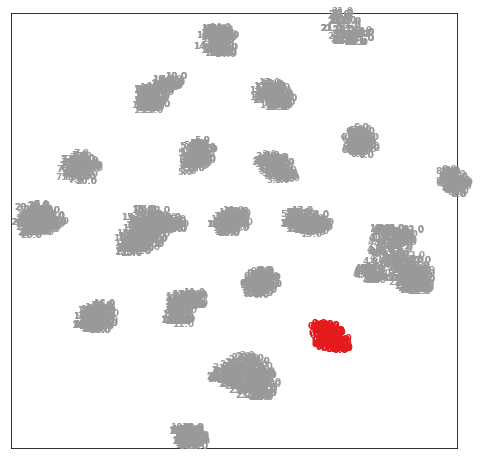

In [88]:
x_min, x_max = X_tsne.min(0), X_tsne.max(0)
X_norm = (X_tsne - x_min) / (x_max - x_min)  # 归一化
plt.figure(figsize=(8, 8))
for i in range(X_norm.shape[0]):
    plt.text(X_norm[i, 0], X_norm[i, 1], str(label[i]), color=plt.cm.Set1(label[i]), 
             fontdict={'weight': 'bold', 'size': 9})
plt.xticks([])
plt.yticks([])
plt.show()

In [7]:
path = 'resnet18_class_20_exclude_4_dim_128_calc_result (1).pkl'

In [8]:
file_1 = open(path, 'rb')
data = pickle.load(file_1)
representation = data['calc_repre']
label = data['label']

In [56]:
tsne = manifold.TSNE(n_components=2,init='pca', random_state=501)
X_tsne = tsne.fit_transform(representation[:2401])



In [97]:
import torch
from torch.optim import lr_scheduler
import torch.optim as optim
from torch.autograd import Variable


import numpy as np
cuda = torch.cuda.is_available()

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

mnist_classes = [str(i) for i in range(24)]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728',
              '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
              '#bcbd22', '#17becf', '#']

def plot_embeddings(embeddings, targets, idx_to_class=None, xlim=None, ylim=None, save_name=None):
    plt.figure(figsize=(10,10))
    for i in range(24):
        inds = np.where(targets==i)[0]
        plt.text(embeddings[inds[0], 0], embeddings[inds[0], 1], idx_to_class[i][:8])
        plt.scatter(embeddings[inds,0], embeddings[inds,1], alpha=0.5)
    if xlim:
        plt.xlim(xlim[0], xlim[1])
    if ylim:
        plt.ylim(ylim[0], ylim[1])
#     if idx_to_class:
#         plt.legend([idx_to_class[i][:8] for i in range(24)])
#     else:
#         plt.legend(mnist_classes)
        
    if save_name:
        plt.savefig(save_name, dpi=100)

def plot_unseen_embeddings(embeddings, targets, unseen_class, idx_to_class=None, class_to_idx=None, xlim=None, ylim=None, save_name=None):
    plt.figure(figsize=(10,10))
    unseen_idx = [class_to_idx[ind] for ind in unseen_class]
    for i in unseen_idx:
        inds = np.where(targets==i)[0]
        plt.text(embeddings[inds[0], 0], embeddings[inds[0], 1], idx_to_class[i][:8])
        plt.scatter(embeddings[inds,0], embeddings[inds,1], alpha=0.5)
    if xlim:
        plt.xlim(xlim[0], xlim[1])
    if ylim:
        plt.ylim(ylim[0], ylim[1])
#     if idx_to_class:
#         plt.legend([idx_to_class[i][:8] for i in range(24)])
#     else:
#         plt.legend(mnist_classes)
        
    if save_name:
        plt.savefig(save_name, dpi=100)


In [81]:
info = open('exclude_class_info_class_20_exclude_4_resnet_50.pkl', 'rb')
info = pickle.load(info)
class_to_idx = info['class_to_ind']
left_class = info['left_class']
print(class_to_idx)

{'0725b0fa-5049-11e9-a657-0242cb7ccd7c': 0, '0af8df9c-716c-11e9-81f4-0242cb7ccd7c': 1, '0c14b476-d740-11e8-b552-0242cb7ccd7c': 2, '1641aac8-e0be-11e8-8688-0242cb7ccd7c': 3, '1f7d796e-5049-11e9-8bbf-0242cb7ccd7c': 4, '22798338-d5c7-11e8-bfcf-0242cb7ccd7c': 5, '338ca592-9ae4-11e8-a2c0-02422fc40004': 6, '4d6c3248-d6bd-11e8-8b47-0242cb7ccd7c': 7, '4ea3cca6-9ae5-11e8-8754-02422fc40004': 8, '4f46d0ac-bb35-11e8-9f16-0242cb74f9f9': 9, '6c940800-6b1f-11e9-95a7-0242cb7ccd7c': 10, '7fb76eec-83e6-11e8-881b-34363bd1db02': 11, '7fb775d8-83e6-11e8-95a8-34363bd1db02': 12, '7fb777ca-83e6-11e8-814b-34363bd1db02': 13, '7fb77db0-83e6-11e8-a2d7-34363bd1db02': 14, '8339dfe6-9ae3-11e8-a39f-02422fc40004': 15, 'a42c44de-d73a-11e8-b9a5-0242cb7ccd7c': 16, 'a81fa274-bb34-11e8-a75b-0242cb74f9f9': 17, 'c473ed6e-80e7-11e8-be39-34363bd1db02': 18, 'c475d67e-80e7-11e8-9d42-34363bd1db02': 19, 'c475e312-80e7-11e8-aada-34363bd1db02': 20, 'd00ba454-25fa-11e9-8f99-0242cb7ccd7c': 21, 'd1b9fae2-5048-11e9-8731-0242cb7ccd7c': 2

In [55]:
print(class_to_idx)
print(left_class)
idx_to_class = {}
for k, v in class_to_idx.items():
    idx_to_class[v] = k
print(idx_to_class)

{'0725b0fa-5049-11e9-a657-0242cb7ccd7c': 0, '0af8df9c-716c-11e9-81f4-0242cb7ccd7c': 1, '0c14b476-d740-11e8-b552-0242cb7ccd7c': 2, '1641aac8-e0be-11e8-8688-0242cb7ccd7c': 3, '1f7d796e-5049-11e9-8bbf-0242cb7ccd7c': 4, '22798338-d5c7-11e8-bfcf-0242cb7ccd7c': 5, '338ca592-9ae4-11e8-a2c0-02422fc40004': 6, '4d6c3248-d6bd-11e8-8b47-0242cb7ccd7c': 7, '4ea3cca6-9ae5-11e8-8754-02422fc40004': 8, '4f46d0ac-bb35-11e8-9f16-0242cb74f9f9': 9, '6c940800-6b1f-11e9-95a7-0242cb7ccd7c': 10, '7fb76eec-83e6-11e8-881b-34363bd1db02': 11, '7fb775d8-83e6-11e8-95a8-34363bd1db02': 12, '7fb777ca-83e6-11e8-814b-34363bd1db02': 13, '7fb77db0-83e6-11e8-a2d7-34363bd1db02': 14, '8339dfe6-9ae3-11e8-a39f-02422fc40004': 15, 'a42c44de-d73a-11e8-b9a5-0242cb7ccd7c': 16, 'a81fa274-bb34-11e8-a75b-0242cb74f9f9': 17, 'c473ed6e-80e7-11e8-be39-34363bd1db02': 18, 'c475d67e-80e7-11e8-9d42-34363bd1db02': 19, 'c475e312-80e7-11e8-aada-34363bd1db02': 20, 'd00ba454-25fa-11e9-8f99-0242cb7ccd7c': 21, 'd1b9fae2-5048-11e9-8731-0242cb7ccd7c': 2

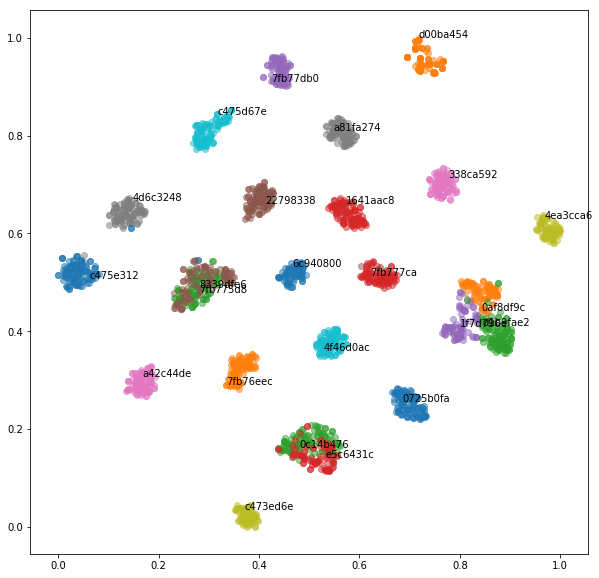

In [89]:
plot_embeddings(X_norm, label[0:2401], idx_to_class)

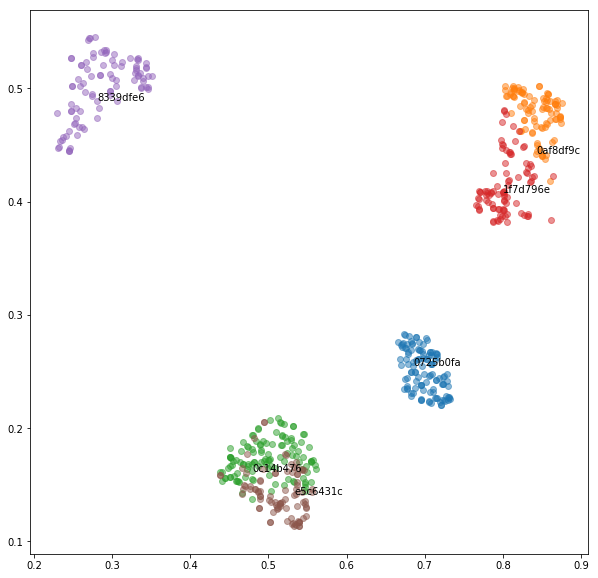

In [98]:
unseen_class=['0725b0fa-5049-11e9-a657-0242cb7ccd7c', '0af8df9c-716c-11e9-81f4-0242cb7ccd7c', '0c14b476-d740-11e8-b552-0242cb7ccd7c', '1f7d796e-5049-11e9-8bbf-0242cb7ccd7c', '8339dfe6-9ae3-11e8-a39f-02422fc40004', 'e5c6431c-de72-11e8-bd33-0242cb7ccd7c']
plot_unseen_embeddings(X_norm, label[0:2401], unseen_class, idx_to_class, class_to_idx)

In [96]:
print(idx_to_class)

{0: '0725b0fa-5049-11e9-a657-0242cb7ccd7c', 1: '0af8df9c-716c-11e9-81f4-0242cb7ccd7c', 2: '0c14b476-d740-11e8-b552-0242cb7ccd7c', 3: '1641aac8-e0be-11e8-8688-0242cb7ccd7c', 4: '1f7d796e-5049-11e9-8bbf-0242cb7ccd7c', 5: '22798338-d5c7-11e8-bfcf-0242cb7ccd7c', 6: '338ca592-9ae4-11e8-a2c0-02422fc40004', 7: '4d6c3248-d6bd-11e8-8b47-0242cb7ccd7c', 8: '4ea3cca6-9ae5-11e8-8754-02422fc40004', 9: '4f46d0ac-bb35-11e8-9f16-0242cb74f9f9', 10: '6c940800-6b1f-11e9-95a7-0242cb7ccd7c', 11: '7fb76eec-83e6-11e8-881b-34363bd1db02', 12: '7fb775d8-83e6-11e8-95a8-34363bd1db02', 13: '7fb777ca-83e6-11e8-814b-34363bd1db02', 14: '7fb77db0-83e6-11e8-a2d7-34363bd1db02', 15: '8339dfe6-9ae3-11e8-a39f-02422fc40004', 16: 'a42c44de-d73a-11e8-b9a5-0242cb7ccd7c', 17: 'a81fa274-bb34-11e8-a75b-0242cb74f9f9', 18: 'c473ed6e-80e7-11e8-be39-34363bd1db02', 19: 'c475d67e-80e7-11e8-9d42-34363bd1db02', 20: 'c475e312-80e7-11e8-aada-34363bd1db02', 21: 'd00ba454-25fa-11e9-8f99-0242cb7ccd7c', 22: 'd1b9fae2-5048-11e9-8731-0242cb7ccd7c

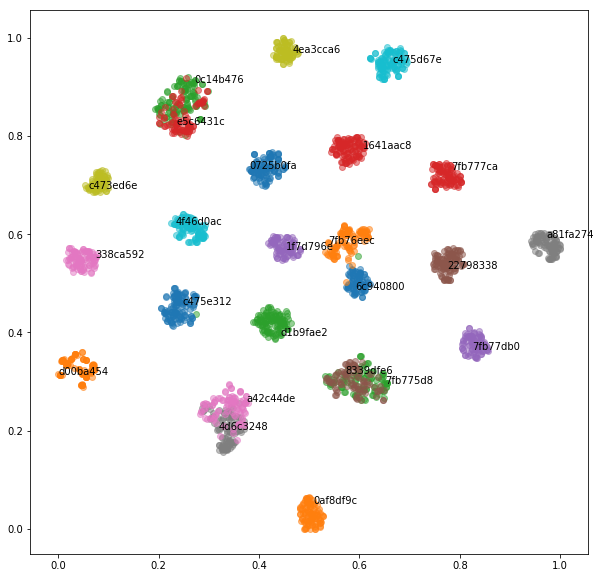

In [79]:
plot_embeddings(X_norm, label[0:2401], idx_to_class)

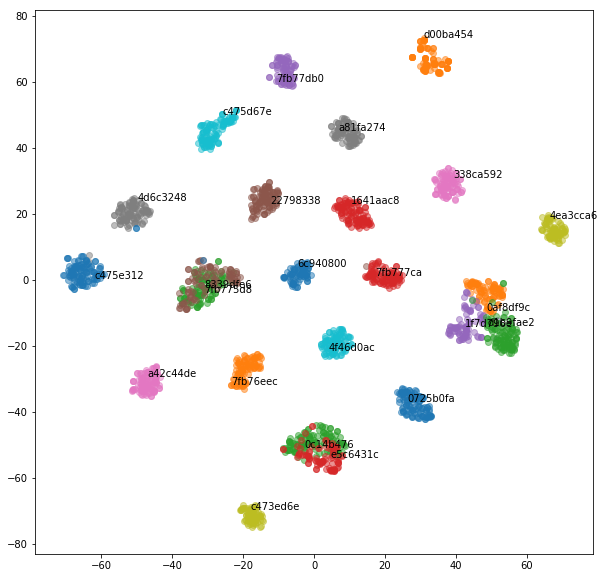

In [100]:
plot_embeddings(X_tsne, label[0:2401], idx_to_class)

In [6]:
import torch
t1 = torch.ones(1,3,150,150)
t2 = torch.ones(5,3,150,150)

In [7]:
t3 = torch.cat((t1, t2), 0)

In [8]:
t3.shape

torch.Size([6, 3, 150, 150])

In [9]:
t4 = t3[1:]

In [10]:
t4.shape

torch.Size([5, 3, 150, 150])